# Salary Prediction — Task 04
This notebook contains EDA, preprocessing and training steps for the salary prediction task. It uses the sample CSV in `data/sample_data.csv`.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv('data__sample_data.csv')
df.head()

,Experience,Age,Education,Skill_Level,Salary
0,1.4,28,Bachelors,Beginner,26105.575337
1,9.0,43,Masters,Advanced,63309.657365
2,4.0,33,Masters,Beginner,18766.725505
3,2.7,24,Bachelors,Advanced,29710.890065
4,0.5,21,Masters,Advanced,38284.972733


In [2]:
df.info()
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experience   500 non-null    float64
 1   Age          500 non-null    int64  
 2   Education    500 non-null    object 
 3   Skill_Level  500 non-null    object 
 4   Salary       500 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 19.7+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Experience,500.0,NaN,NaN,NaN,3.0128,2.922217,0.0,0.8,2.2,4.225,14.9
Age,500.0,NaN,NaN,NaN,27.53,5.890883,13.0,24.0,27.0,31.0,47.0
Education,500,4,Bachelors,252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Skill_Level,500,4,Intermediate,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,500.0,NaN,NaN,NaN,30265.480298,11172.574375,4403.838535,22461.822497,29419.081166,36599.428737,75431.991136


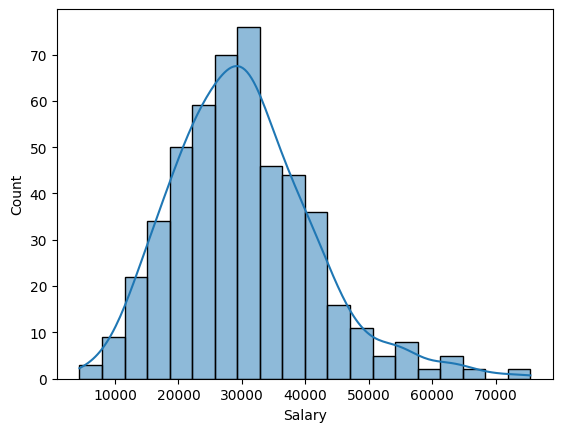

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['Salary'], kde=True)
plt.show()

In [4]:
# Training quick demo
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
import sklearn
from packaging import version

# Features & target
X = df.drop(columns=['Salary'])
y = df['Salary']

# Feature groups
num = ['Experience', 'Age']
cat = ['Education', 'Skill_Level']

# Numeric pipeline
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Choose correct OneHotEncoder parameter based on sklearn version
if version.parse(sklearn.__version__) >= version.parse("1.2"):
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
else:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Categorical pipeline
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', ohe)
])

# Column transformer
pre = ColumnTransformer([
    ('num', num_pipe, num),
    ('cat', cat_pipe, cat)
])

# Full pipeline with RandomForest
pipe = Pipeline([
    ('pre', pre),
    ('rf', RandomForestRegressor(n_estimators=20, random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
pipe.fit(X_train, y_train)

# Evaluate
print('Test R2:', pipe.score(X_test, y_test))


Test R2: 0.6610336424445993


## Notes
- Replace sample data with real dataset to reproduce internship results.
- The `models/` folder contains a demo pipeline saved with `joblib`.